In [1]:
from matplotlib import pyplot
import seaborn

In [2]:
import numpy
import tmol
import tmol.tests.data.pdb as test_data

from tmol.system.residue.io import ResidueReader
from tmol.system.residue.packed import PackedResidueSystem

from tmol.score import ScoreGraph, system_graph_params

import tmol.database

In [3]:
reader = ResidueReader(residue_db=tmol.database.basic.residues)
res = reader.parse_pdb(test_data.get("1UBQ"))

In [4]:
prs = PackedResidueSystem().from_residues(res)

In [5]:
import seaborn
import torch

In [6]:
from tmol.viewer import SystemViewer

In [7]:
from toolz.curried import valmap, compose

In [8]:
import toolz

In [31]:
score_graph = ScoreGraph(
    chemical_db = tmol.database.basic,
    **system_graph_params(prs, drop_missing_atoms=True),
)

score_graph.ljlk_interaction_weight
score_graph.type_pair_ljlk_params
pass


In [32]:
%%visual_profile
score_graph.total_score.backward()

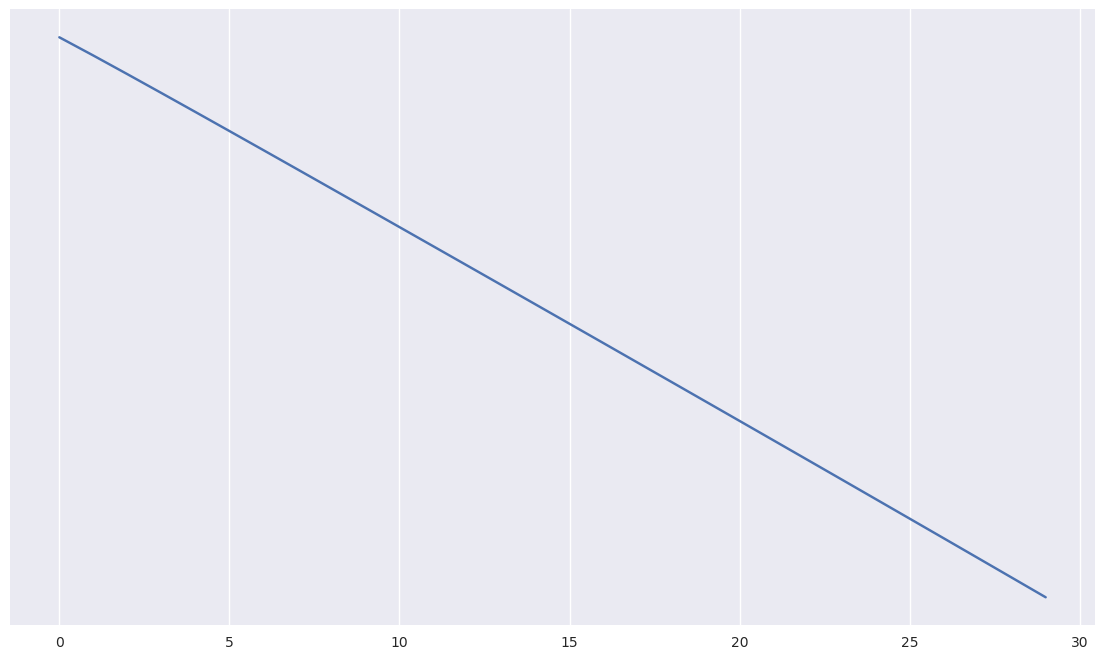

In [15]:
from IPython.display import clear_output

trace = []

optimizer = torch.optim.Adadelta((score_graph.coords,), lr=.3)

def step():
    optimizer.zero_grad()
    
    total_score = score_graph.step()
    
    trace.append(total_score.detach().numpy())
    return total_score

for i in range(3):
    for _ in range(10):
        optimizer.step(step)
    
    viewer.update()

pyplot.figure()
pyplot.plot(trace)
pyplot.yscale("symlog")

pyplot.show()